<a href="https://colab.research.google.com/github/kpatel3j/US-Accidents-Anlysis/blob/main/US_Accidents.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# US Accidents Exploratory Data Analysis

This is a countrywide car accident dataset, which covers 49 states of the USA. The accident data are collected from February 2016 to Dec 2020, using multiple APIs that provide streaming traffic incident (or event) data. These APIs broadcast traffic data captured by a variety of entities, such as the US and state departments of transportation, law enforcement agencies, traffic cameras, and traffic sensors within the road-networks. Currently, there are about 1.5 million accident records in this dataset. 

#### Import libraries

In [ ]:
import pandas as pd 
import numpy as np
from scipy import stats
import datetime
import calendar
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### Download the data

In [ ]:
!pip install opendatasets --upgrade 

In [ ]:
import opendatasets as od
url = 'https://www.kaggle.com/sobhanmoosavi/us-accidents'
od.download(url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: kpatel3j
Your Kaggle Key: ··········


100%|██████████| 117M/117M [00:00<00:00, 150MB/s]


In [ ]:
file_path = './us-accidents/US_Accidents_Dec20_updated.csv'
df = pd.read_csv(file_path)

##### Look at the data 

In [ ]:
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2716600,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,NaN,Outerbelt E,R,Dublin,Franklin,OH,43017,US,US/Eastern,KOSU,2016-02-08 00:53:00,42.1,36.1,58.0,29.76,10.0,SW,10.4,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2716601,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,0.747,At OH-4/OH-235/Exit 41 - Accident.,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
2,A-2716602,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10266,-84.52468,39.10209,-84.52396,0.055,At I-71/US-50/Exit 1 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45203,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day
3,A-2716603,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10148,-84.52341,39.09841,-84.52241,0.219,At I-71/US-50/Exit 1 - Accident.,NaN,US-50 E,R,Cincinnati,Hamilton,OH,45202,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day
4,A-2716604,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.06213,-81.53784,41.06217,-81.53547,0.123,At Dart Ave/Exit 21 - Accident.,NaN,I-77 N,R,Akron,Summit,OH,44311,US,US/Eastern,KAKR,2016-02-08 06:54:00,39.0,NaN,55.0,29.65,10.0,Calm,NaN,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day


In [ ]:
# get information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516064 entries, 0 to 1516063
Data columns (total 47 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   ID                     1516064 non-null  object 
 1   Severity               1516064 non-null  int64  
 2   Start_Time             1516064 non-null  object 
 3   End_Time               1516064 non-null  object 
 4   Start_Lat              1516064 non-null  float64
 5   Start_Lng              1516064 non-null  float64
 6   End_Lat                1516064 non-null  float64
 7   End_Lng                1516064 non-null  float64
 8   Distance(mi)           1516064 non-null  float64
 9   Description            1516064 non-null  object 
 10  Number                 469969 non-null   float64
 11  Street                 1516064 non-null  object 
 12  Side                   1516064 non-null  object 
 13  City                   1515981 non-null  object 
 14  County            

In [ ]:
# Identify and calculate the percentage of the missing values in each attribute

missing_value_df = df.isnull().sum()
missing_value_df.sort_values(ascending = False)

Number                   1046095
Precipitation(in)         510549
Wind_Chill(F)             449316
Wind_Speed(mph)           128862
Humidity(%)                45509
Visibility(mi)             44211
Weather_Condition          44007
Temperature(F)             43033
Wind_Direction             41858
Pressure(in)               36274
Weather_Timestamp          30264
Airport_Code                4248
Timezone                    2302
Zipcode                      935
City                          83
Nautical_Twilight             83
Astronomical_Twilight         83
Civil_Twilight                83
Sunrise_Sunset                83
Amenity                        0
Bump                           0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                        0
End_Lng                        0
Distance(mi)                   0
Description                    0
Street    

In [ ]:
# Convert the Start_Time & End_Time Variable into Datetime Feature and append it to the dataframe
df.Start_Time = pd.to_datetime(df.Start_Time)
df.End_Time = pd.to_datetime(df.End_Time)
df["Year"] = df["Start_Time"].dt.year
df["Month"] = df["Start_Time"].dt.month
df["Day"] = df["Start_Time"].dt.day
df["Hour"] = df["Start_Time"].dt.hour

df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Year,Month,Day,Hour
0,A-2716600,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,NaN,Outerbelt E,R,Dublin,Franklin,OH,43017,US,US/Eastern,KOSU,2016-02-08 00:53:00,42.1,36.1,58.0,29.76,10.0,SW,10.4,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,2016,2,8,0
1,A-2716601,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,0.747,At OH-4/OH-235/Exit 41 - Accident.,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,2016,2,8,5
2,A-2716602,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10266,-84.52468,39.10209,-84.52396,0.055,At I-71/US-50/Exit 1 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45203,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day,2016,2,8,6
3,A-2716603,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10148,-84.52341,39.09841,-84.52241,0.219,At I-71/US-50/Exit 1 - Accident.,NaN,US-50 E,R,Cincinnati,Hamilton,OH,45202,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day,2016,2,8,6
4,A-2716604,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.06213,-81.53784,41.06217,-81.53547,0.123,At Dart Ave/Exit 21 - Accident.,NaN,I-77 N,R,Akron,Summit,OH,44311,US,US/Eastern,KAKR,2016-02-08 06:54:00,39.0,NaN,55.0,29.65,10.0,Calm,NaN,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day,2016,2,8,6


# Location Analysis

## Timezone Analysis

In [ ]:
# Count accidents per timezone and create a dataframe

per_tz_accident = df.Timezone.value_counts()
timezone = pd.DataFrame(per_tz_accident.reset_index().rename(columns={'index':'Timezone', 'Timezone':'Accidents'}))
tz = timezone.groupby("Timezone")["Accidents"].sum()
timezone

,Timezone,Accidents
0,US/Eastern,587961
1,US/Pacific,564358
2,US/Central,265204
3,US/Mountain,96239


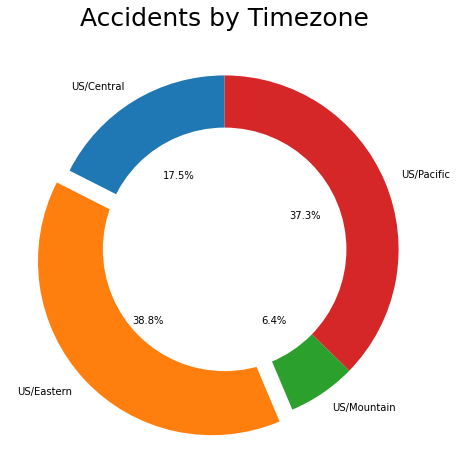

In [ ]:
# Create a visualization of timezones

pie, ax = plt.subplots(figsize=[20,8])
labels = tz.keys()
explode = (0, 0.1, 0, 0)
plt.pie(x=tz, autopct="%.1f%%", explode=explode, labels=labels, pctdistance=0.5, startangle=90)
plt.title("Accidents by Timezone", fontsize=25);

# draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

Analysis

1. Eastern timezone has the highest 587961 (38.8%) no. of accidents.
2. Pacific timezone has the 2nd highest 564358 (37.3%) no. of accidents.
3. Mountain timezone has the least 96239 (6.4%) no. of accidents.

## State Analysis

In [ ]:
# Find top 10 states with highest number of accidents

per_state_accident = df.State.value_counts()
top_10_state = pd.DataFrame(per_state_accident.head(10).reset_index().rename(columns={'index':'State', 'State':'Accidents'}))
top_10_state

,State,Accidents
0,CA,448833
1,FL,153007
2,OR,87484
3,TX,75142
4,NY,60974
5,MN,52345
6,VA,51198
7,NC,50159
8,PA,42844
9,IL,41709


In [ ]:
# Percentage calculation for top 10 states

total_accidents = sum(df.State.value_counts())
print("Total Accidents: " + str(total_accidents))

percentage = pd.DataFrame(((per_state_accident/total_accidents)*100).reset_index().rename(columns={'index':'State', 'State':'Percentage'}))
print(percentage.head(10))

total_top_10_percent = sum(percentage.Percentage.head(10))
print("Total Percentage of top 10 State: " + str(total_top_10_percent))

Total Accidents: 1516064
  State  Percentage
0    CA   29.605149
1    FL   10.092384
2    OR    5.770469
3    TX    4.956387
4    NY    4.021862
5    MN    3.452691
6    VA    3.377034
7    NC    3.308501
8    PA    2.826002
9    IL    2.751137
Total Percentage of top 10 State: 70.16161586845939


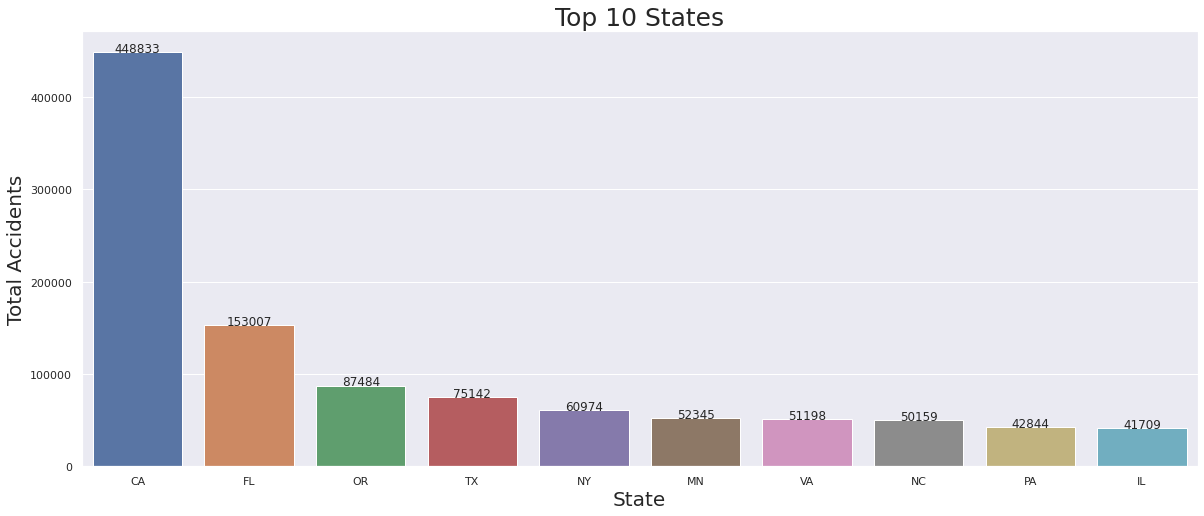

In [ ]:
# Create a visualization for top 10 state
sns.set(rc = {'figure.figsize':(20,8)})
g = sns.barplot(y = "Accidents", x = "State", data=top_10_state)
plt.title("Top 10 States", fontsize = 25)
plt.xlabel("State", fontsize = 20)
plt.ylabel("Total Accidents", fontsize = 20)
for index, row in top_10_state.iterrows():
    g.text(row.name,row.Accidents, round(row.Accidents), ha = 'center')
plt.show()

Analysis

1. California has the highest 448833 (29.60%) no. of accidents; averaging 7738 accidents monthly.
2. Florida has the 2nd highest 153007 (10.09%) no. of accidents; averaging 2638 accidents monthly.
3. Around 70% accidents were recorded only from the top 10 state out of 49 state for past 5 years.

## City Analysis

In [ ]:
# Find top 10 cities with highest numer of accidents

per_city_accident = df.City.value_counts()
top_10_cities = pd.DataFrame(per_city_accident.head(10).reset_index().rename(columns={'index':'City', 'City':'Accidents'}))
top_10_cities

,City,Accidents
0,Los Angeles,39984
1,Miami,36233
2,Charlotte,22203
3,Houston,20843
4,Dallas,19497
5,Sacramento,18431
6,Orlando,16169
7,Portland,14805
8,San Diego,14090
9,Minneapolis,12653


In [ ]:
#Count unique cities & percentage calculation
print("Unique City Count: " + str(len(df.City.unique())))

total_accidents = sum(df.City.value_counts())
print("Total Accidents: " + str(total_accidents))

percentage = pd.DataFrame(((per_city_accident/total_accidents)*100).reset_index().rename(columns={'index':'City', 'City':'Percentage'}))
print(percentage.head(10))

total_top_10_percent = sum(percentage.Percentage.head(10))
print("Total Percentage of top 10 City: " + str(total_top_10_percent))

Unique City Count: 10658
Total Accidents: 1515981
          City  Percentage
0  Los Angeles    2.637500
1        Miami    2.390070
2    Charlotte    1.464596
3      Houston    1.374885
4       Dallas    1.286098
5   Sacramento    1.215780
6      Orlando    1.066570
7     Portland    0.976595
8    San Diego    0.929431
9  Minneapolis    0.834641
Total Percentage of top 10 City: 14.176167115550918


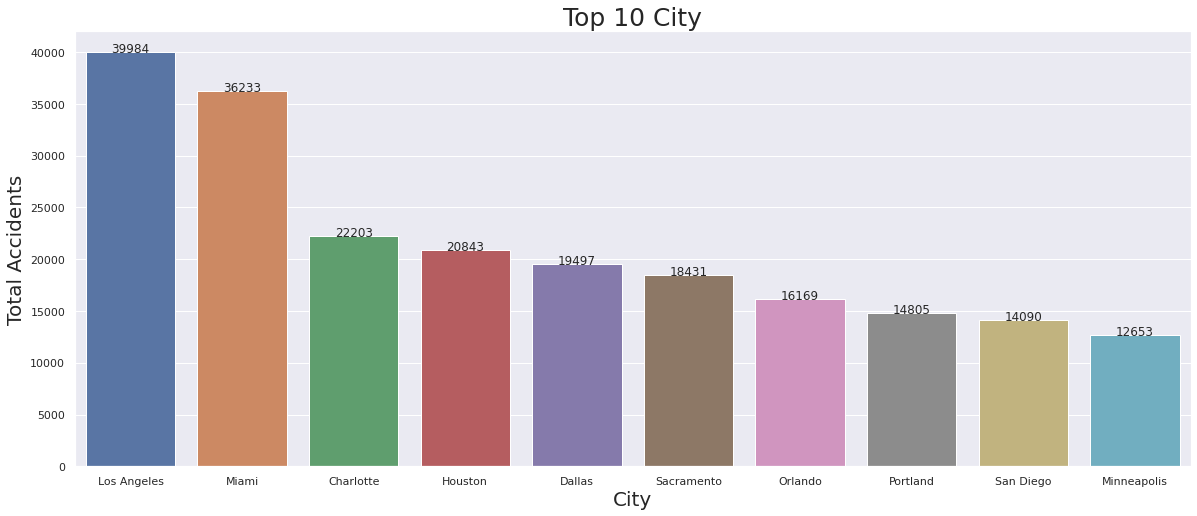

In [ ]:
# Create a visualization for top 10 city
sns.set(rc = {'figure.figsize':(20,8)})
g=sns.barplot(y = "Accidents", x = "City", data=top_10_cities)
plt.title("Top 10 City", fontsize = 25)
plt.xlabel("City", fontsize = 20)
plt.ylabel("Total Accidents", fontsize = 20)
for index, row in top_10_cities.iterrows():
    g.text(row.name,row.Accidents, round(row.Accidents), ha = 'center')
plt.show()

Analysis
1. Los Angeles city has the highest 39984 (2.63%)no. of accidents; averaging 689 accidents monthly.
2. Miami city has the 2nd highest 36233 (2.39%) no. of accidents; averaging 624 accidents monthly.
3. Around 14% accident were recorded only from the top 10 cities out of 10,658 cities for past 5 years.

## Street Analysis

In [ ]:
# Find top 10 street with highest numer of accidents

per_street_accident = df.Street.value_counts()
top_10_street = pd.DataFrame(per_street_accident.head(10).reset_index().rename(columns={'index':'Street', 'Street':'Accidents'}))
top_10_street

,Street,Accidents
0,I-5 N,26645
1,I-95 N,22407
2,I-95 S,19406
3,I-5 S,18432
4,I-10 E,14681
5,I-10 W,14305
6,I-80 W,10996
7,I-80 E,10465
8,I-94 W,9199
9,I-405 N,9026


In [ ]:
#Count unique street & percentage calculation
print("Unique Street Count: " + str(len(df.Street.unique())))

total_accidents = sum(df.Street.value_counts())
print("Total Accidents: " + str(total_accidents))

percentage = pd.DataFrame(((per_street_accident/total_accidents)*100).reset_index().rename(columns={'index':'Street', 'Street':'Percentage'}))
print(percentage.head(10))

total_top_10_percent = sum(percentage.Percentage.head(10))
print("Total Percentage of top 10 Street: " + str(total_top_10_percent))

Unique Street Count: 93048
Total Accidents: 1516064
    Street  Percentage
0    I-5 N    1.757512
1   I-95 N    1.477972
2   I-95 S    1.280025
3    I-5 S    1.215780
4   I-10 E    0.968363
5   I-10 W    0.943562
6   I-80 W    0.725299
7   I-80 E    0.690274
8   I-94 W    0.606769
9  I-405 N    0.595357
Total Percentage of top 10 Street: 10.260912468075226


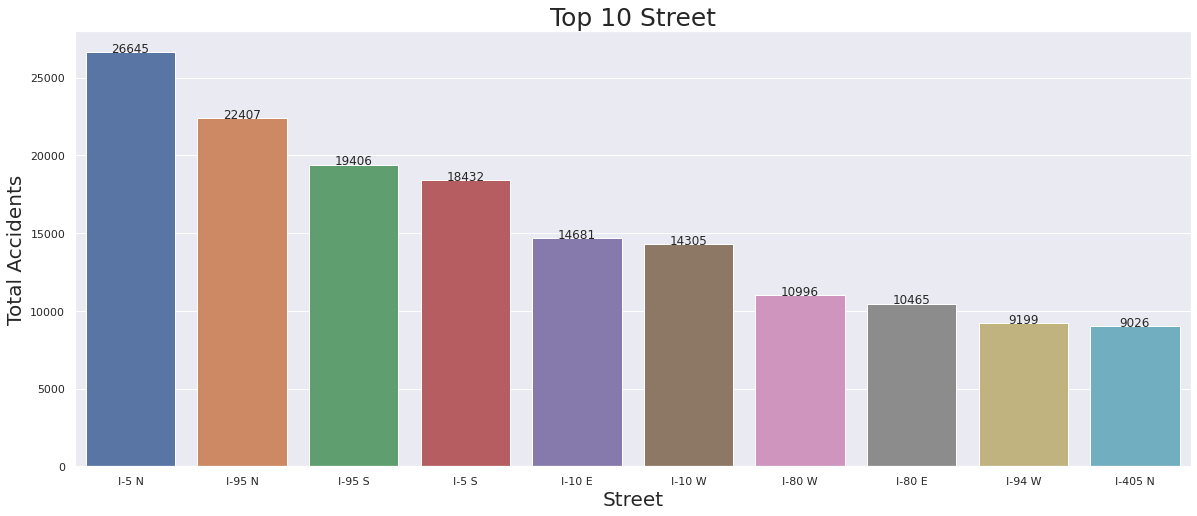

In [ ]:
# Create a visualization of top 10 street
sns.set(rc = {'figure.figsize':(20,8)})
g=sns.barplot(y = "Accidents", x = "Street", data=top_10_street)
plt.title("Top 10 Street", fontsize = 25)
plt.xlabel("Street", fontsize = 20)
plt.ylabel("Total Accidents", fontsize = 20)
for index, row in top_10_street.iterrows():
    g.text(row.name,row.Accidents, round(row.Accidents), ha = 'center')
plt.show()

Analysis

1. I-5 N has the highest 26645 (1.75%) no. of accidents; averaging 459 accidents monthly.
2. I-95 N has the 2nd highest 22407 (1.47%) no. of accidents; averaging 386 accidents monthly.
3. Around 10% accident were recorded only from the top 10 street out of 93048 cities for past 5 years.

# Time Analysis

## Yearly Analysis

In [ ]:
# Create a dataframe with numer of accidents by year

per_year = df.Year.value_counts()
year = pd.DataFrame(per_year.reset_index().rename(columns={'index':'Year', 'Year':'Accidents'})).sort_values(by='Year', ascending=True)
yearly = year.groupby("Year")["Accidents"].sum()
year

,Year,Accidents
4,2016,129325
2,2017,170099
3,2018,166936
1,2019,261772
0,2020,787932


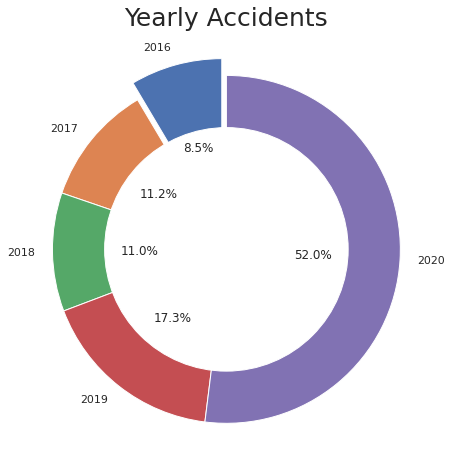

In [ ]:
# Create a visualization for yearly accidents
pie, ax = plt.subplots(figsize=[20,8])
labels = yearly.keys()
explode = (0.1, 0, 0, 0, 0)
plt.pie(x=yearly, autopct="%.1f%%", explode=explode, labels=labels, pctdistance=0.5, startangle=90)
plt.title("Yearly Accidents", fontsize=25);

# draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

Analysis

1. Year 2020 has the highest 787932 (52.0%) and half of the no. of accidents.
2. No. of accidents has been increasing from year 2016 to 2020 annually. 
3. Year 2018 had a 0.2% drop in accident from year 2017.
4. Year 2016 has the leat 129325 (8.5%) no. of accidents.


## Monthly Analysis

In [ ]:
# Create a dataframe with numer of accidents by month
per_month = df.Month.value_counts()
month = pd.DataFrame(per_month.reset_index().rename(columns={'index':'Month', 'Month':'Accidents'}))
month = month.sort_values(['Month']).reset_index(drop=True)
month_names = list(calendar.month_name)[1:]
month.Month = month_names
month

,Month,Accidents
0,January,88540
1,February,82419
2,March,96802
3,April,107007
4,May,108195
5,June,113048
6,July,53650
7,August,62903
8,September,122906
9,October,181074


In [ ]:
#Monthly percentage calculation

total_accidents = sum(df.Start_Time.dt.month.value_counts())
print("Total Accidents: " + str(total_accidents))

percentage = pd.DataFrame(((month['Accidents']/total_accidents)*100).reset_index().rename(columns={'index':'Month', 'Accidents':'Percentage'}))

percentage = percentage.sort_values(['Month']).reset_index(drop=True)
month_names = list(calendar.month_name)[1:]
percentage.Month = month_names
percentage

Total Accidents: 1516064


,Month,Percentage
0,January,5.840123
1,February,5.436380
2,March,6.385087
3,April,7.058211
4,May,7.136572
5,June,7.456677
6,July,3.538769
7,August,4.149099
8,September,8.106914
9,October,11.943691


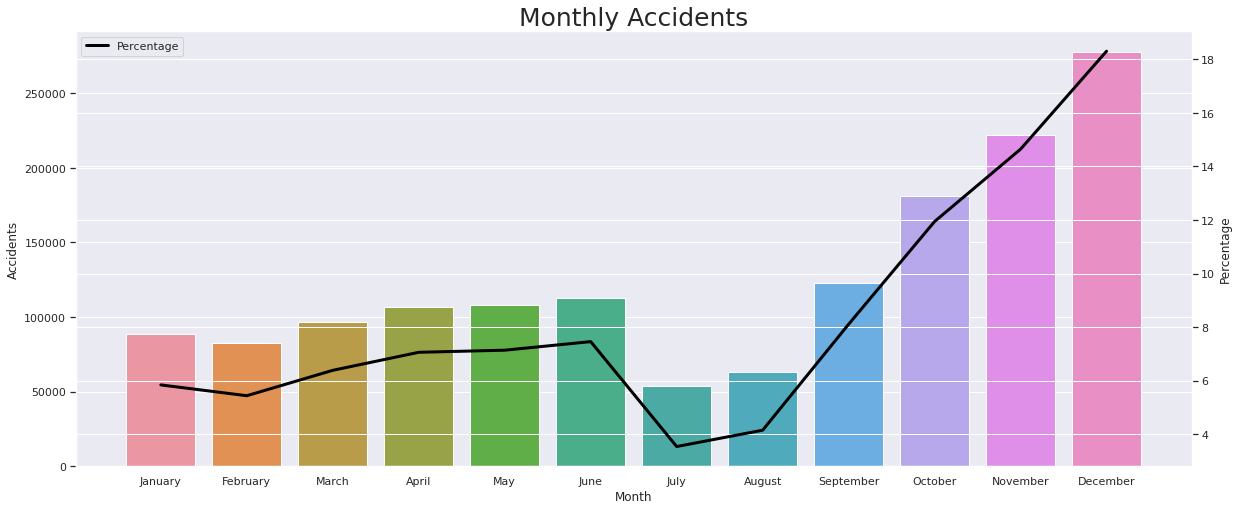

In [ ]:
# Create a visualization for accidents by month
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
sns.barplot(data=month, x="Month", y="Accidents", label='Accidents', ax=ax1)
sns.lineplot(data=percentage, x="Month", y= "Percentage", color="black", lw=3, ls="-", label='Percentage', ax=ax2)
plt.title("Monthly Accidents", fontsize = 25)
plt.legend()
plt.show()

Analysis

1. December has the highest 277489 (5.84%) and half of the no. of accidents.
2. No. of accidents has been increasing from september to December accounting for half of the accidents averaging 52%.
3. July has the least 53650 (3.53%) no. of accidents.

## Daily Analysis

In [ ]:
# Create a dataframe with numer of accidents by days of the week
day = pd.DataFrame(df.Start_Time.dt.weekday.value_counts()).reset_index().rename(columns={'index':'Day', 'Start_Time':'Accidents'}).sort_values(by='Day', ascending=True)
daily = day.groupby("Day")["Accidents"].sum()
days = dict(zip(calendar.day_name, range(7))); 
days['Monday']
day.Day=days
day

,Day,Accidents
4,Monday,235831
3,Tuesday,250900
1,Wednesday,255775
0,Thursday,258036
2,Friday,254127
5,Saturday,137620
6,Sunday,123775


In [ ]:
# Daily percentage calculation

total_accidents = sum(df.Start_Time.dt.day.value_counts())
print("Total Accidents: " + str(total_accidents))

percentage = pd.DataFrame(((day['Accidents']/total_accidents)*100).reset_index().rename(columns={'index':'Day', 'Accidents':'Percentage'}))
days = dict(zip(calendar.day_name, range(7))); 
percentage.Day = days
percentage

Total Accidents: 1516064


,Day,Percentage
0,Monday,15.555478
1,Tuesday,16.549433
2,Wednesday,16.870990
3,Thursday,17.020126
4,Friday,16.762287
5,Saturday,9.077453
6,Sunday,8.164233


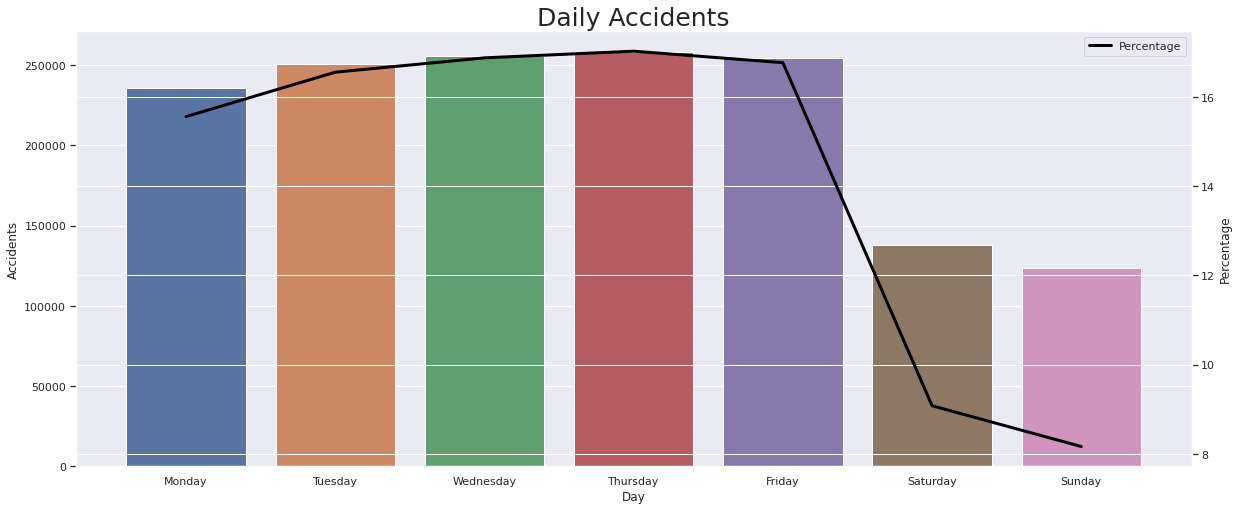

In [ ]:
# Create a visualization for accidents by days of the week
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
sns.barplot(data=day, x="Day", y="Accidents", label='Accidents', ax=ax1)
sns.lineplot(data=percentage, x="Day", y= "Percentage", color="black", lw=3, ls="-", label='Percentage', ax=ax2)
plt.title("Daily Accidents", fontsize = 25)
plt.legend()
plt.show()

Analysis

1. Weekdays has the highest and most no. of accidents accounting for almost 82.0% in US.
2. Thursday has the highest 258036 (17.02%) no. of accidents.
3. Saturday and Sunday has the least 261395 (17.26%) no. of accidents.


## Hourly Analysis

In [ ]:
# Create a dataframe with numer of accidents by hour of the day
hour = pd.DataFrame(df.Start_Time.dt.hour.value_counts()).reset_index().rename(columns={'index':'Hour', 'Start_Time':'Accidents'}).sort_values(by='Hour', ascending=True)
hour

,Hour,Accidents
18,0,46125
19,1,43434
21,2,38801
22,3,32175
23,4,29478
20,5,40105
11,6,57859
7,7,73938
6,8,75802
10,9,59744


In [ ]:
# Hourly percentage calculation

total_accidents = sum(df.Start_Time.dt.hour.value_counts())
print("Total Accidents: " + str(total_accidents))

percentage = pd.DataFrame(((hour['Accidents']/total_accidents)*100).reset_index().rename(columns={'index':'Hour', 'Accidents':'Percentage'}))
percentage

Total Accidents: 1516064


,Hour,Percentage
0,18,3.042418
1,19,2.864919
2,21,2.559325
3,22,2.122272
4,23,1.944377
5,20,2.645337
6,11,3.816396
7,7,4.876971
8,6,4.999921
9,10,3.940731


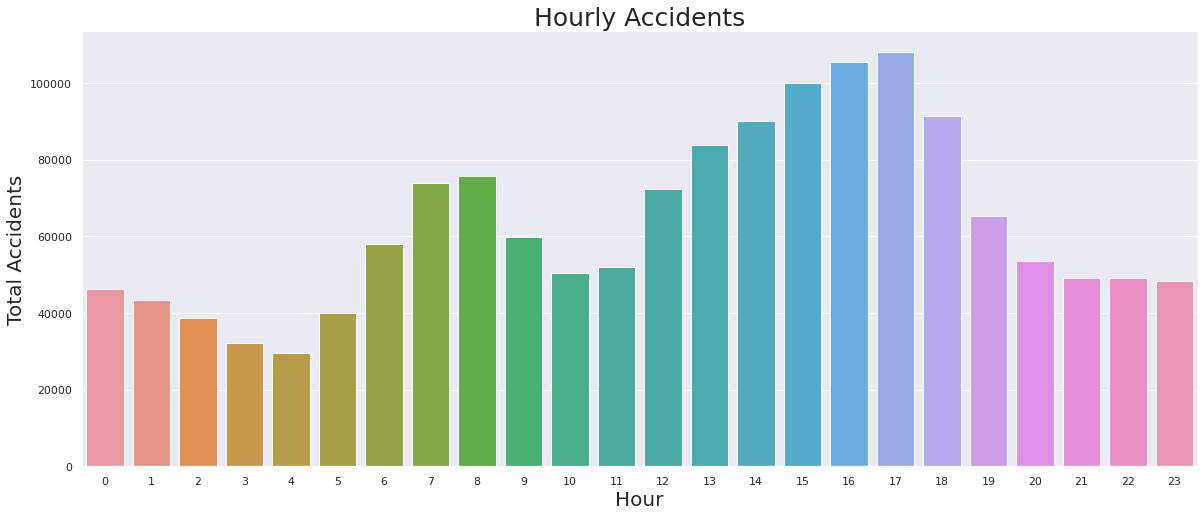

In [ ]:
# Create a visualization for hourly accidents
sns.set(rc = {'figure.figsize':(20,8)})
g=sns.barplot(y = "Accidents", x = "Hour", data=hour)
plt.title("Hourly Accidents", fontsize = 25)
plt.xlabel("Hour", fontsize = 20)
plt.ylabel("Total Accidents", fontsize = 20)
plt.show()

Analysis

1. Nearly 45.0% of the accidents happens during morning (between 6 to 9 am; 18.0%) and evening (between 3 to 6 pm; 27.0%) rush hours.
2. The highest 108011 (7.12%) no. of accidens happens at 5 pm. 

# Severity Analysis

In [ ]:
# Create a dataframe for Severity with the numer of accidents

severity = df.Severity.value_counts()
severity = pd.DataFrame(severity.reset_index().rename(columns={'index':'Severity', 'Severity':'Accidents'}))
severily = severity.groupby("Severity")["Accidents"].sum()
severity

,Severity,Accidents
0,2,1212382
1,3,161052
2,4,114452
3,1,28178


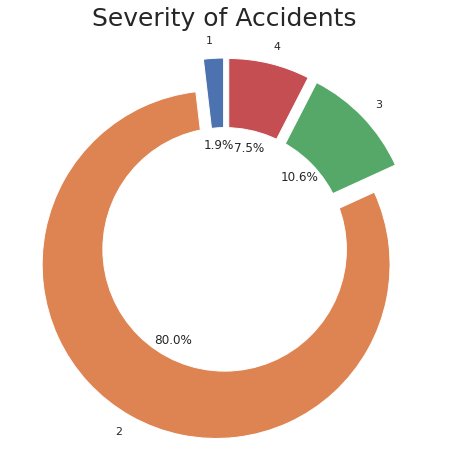

In [ ]:
# Create a visualization for severity of accidents
pie, ax = plt.subplots(figsize=[20,8])
labels = severily.keys()
explode = (0.1, 0.1, 0.1, 0.1)
plt.pie(x=severily, autopct="%.1f%%", explode=explode, labels=labels, pctdistance=0.5, startangle=90)
plt.title("Severity of Accidents", fontsize=25);

# draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

Analysis

1. Nearly 80.0% of the accidents has a moderate impact on the traffic.
2. Only 7.5% of the accidents has a severe impact on the traffic.

## Severity by year

<function matplotlib.pyplot.show>

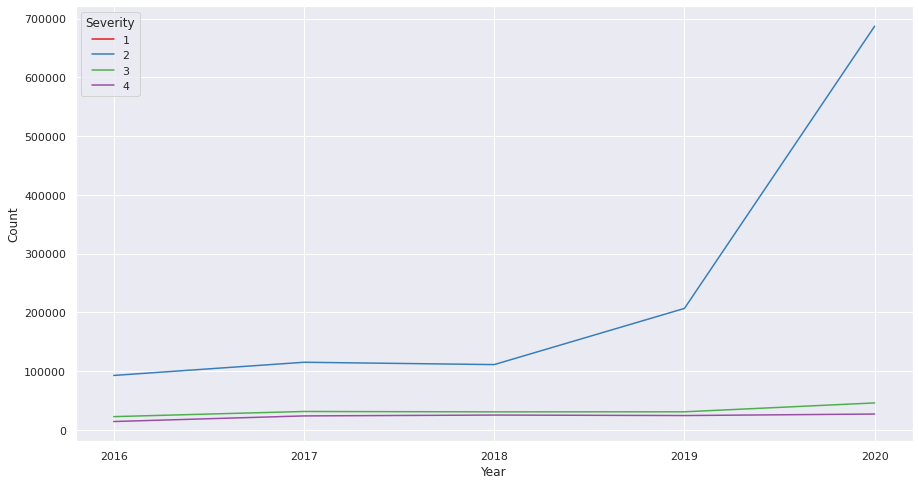

In [ ]:
# Group by year and group by year and severity
group_year = df.groupby(["Year"]).agg(Count = ('ID','count'))
group_year_sev2 = df.groupby(["Year","Severity"]).agg(Count = ('ID','count')).reset_index()

# Create a visualization for severity vs year
fig = plt.figure(figsize=(15,8))
sns.lineplot(x='Year',y='Count',hue="Severity",data=group_year_sev2,palette="Set1")

plt.xticks(np.arange(2016, 2021, 1.0))
plt.show

Analysis
1. Severity 2 accidents are increasing drastically from year 2019 to 2020.
2. Severity 3 accidents also increased a bit from year 2019 to 2020.
3. Severity 1 and 4 are relatively flat year over year.

# Weather Conditions Analysis

In [ ]:
# Create a dataframe for Weather conditions affect on accidents

weather_condition = df.Weather_Condition.value_counts()
top_weather_condition = pd.DataFrame(weather_condition.head(10).reset_index().rename(columns={'index':'Weather_Condition', 'Weather_Condition':'Accidents'}))
top_weather_condition

,Weather_Condition,Accidents
0,Fair,465252
1,Mostly Cloudy,193595
2,Clear,180223
3,Cloudy,161291
4,Partly Cloudy,133102
5,Overcast,87853
6,Light Rain,72511
7,Scattered Clouds,47061
8,Light Snow,22113
9,Fog,19777


In [ ]:
#Count unique weather condition & percentage calculation
print("Unique weather condition Count: " + str(len(df.Weather_Condition.unique())))

total_accidents = sum(df.Weather_Condition.value_counts())
print("Total Accidents: " + str(total_accidents))

percentage = pd.DataFrame(((weather_condition/total_accidents)*100).reset_index().rename(columns={'index':'Weather_Condition', 'Weather_Condition':'Percentage'}))
print(percentage.head(10))

total_top_10_percent = sum(percentage.Percentage.head(10))
print("Total Percentage of top 10 weather condition: " + str(total_top_10_percent))

Unique weather condition Count: 117
Total Accidents: 1472057
  Weather_Condition  Percentage
0              Fair   31.605570
1     Mostly Cloudy   13.151325
2             Clear   12.242936
3            Cloudy   10.956845
4     Partly Cloudy    9.041905
5          Overcast    5.968043
6        Light Rain    4.925828
7  Scattered Clouds    3.196955
8        Light Snow    1.502184
9               Fog    1.343494
Total Percentage of top 10 weather condition: 93.93508539411177


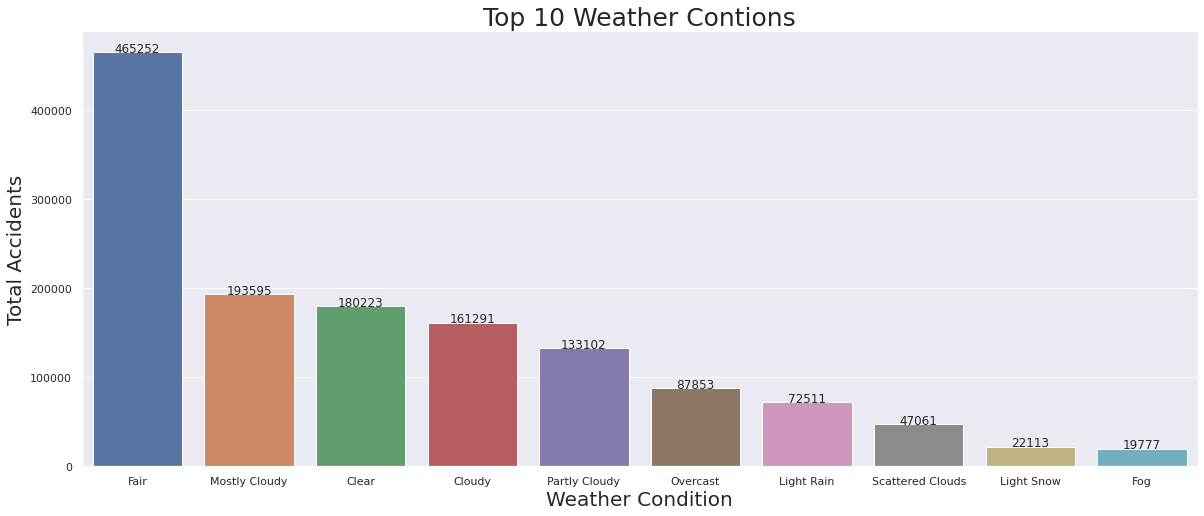

In [ ]:
# Create a visualization for top 10 weather condition
sns.set(rc = {'figure.figsize':(20,8)})
g=sns.barplot(y = "Accidents", x = "Weather_Condition", data=top_weather_condition)
plt.title("Top 10 Weather Contions", fontsize = 25)
plt.xlabel("Weather Condition", fontsize = 20)
plt.ylabel("Total Accidents", fontsize = 20)
for index, row in top_weather_condition.iterrows():
    g.text(row.name,row.Accidents, round(row.Accidents), ha = 'center')
plt.show()

Analysis
1. Most accidents happens in a fair weather condition 465252 (31.60%).
2. Mostly cloudy weather condtion rates 2nd with the 193595 (13.15%).
3. Weather condition has not much impact on accidents.

# Temperature Analysis

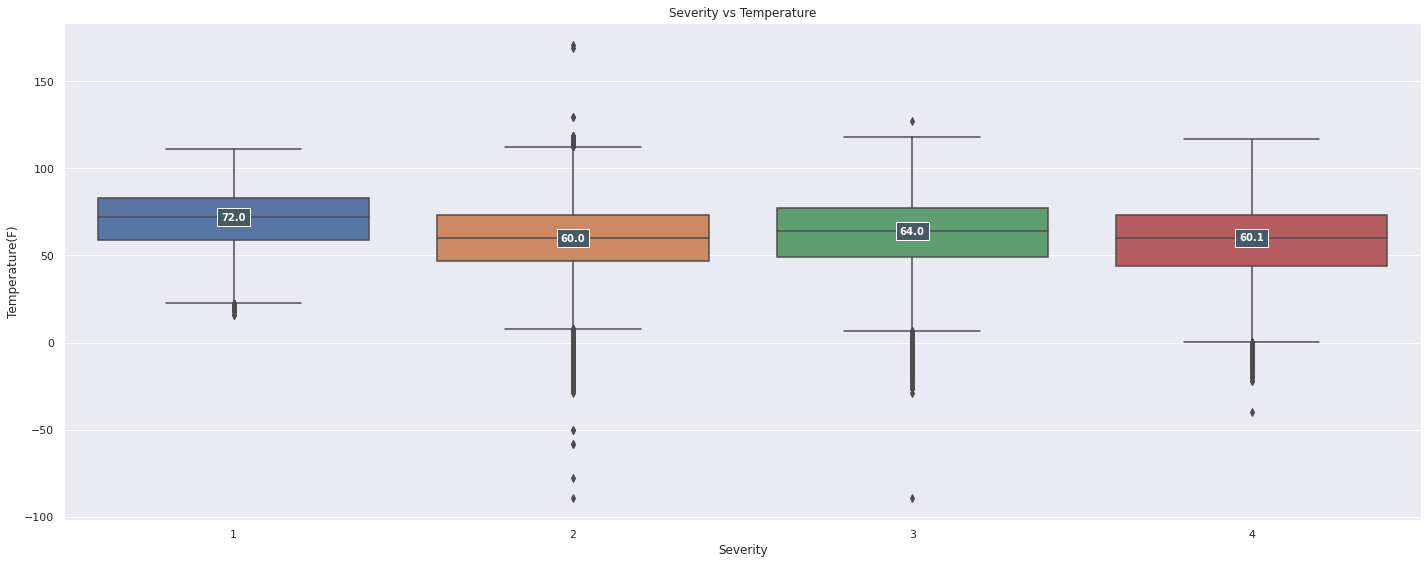

In [ ]:
# Create a temperature vs severity visualization

box_plot = sns.boxplot(x="Severity", y="Temperature(F)", data=df)
box_plot.set_title('Severity vs Temperature')

ax = box_plot.axes
lines = ax.get_lines()
categories = ax.get_xticks()

for cat in categories:
    y = round(lines[4+cat*6].get_ydata()[0],1) 

    ax.text(
        cat, 
        y, 
        f'{y}', 
        ha='center', 
        va='center', 
        fontweight='bold', 
        size=10,
        color='white',
        bbox=dict(facecolor='#445A64'))

box_plot.figure.tight_layout()

Analysis
1. Severity 2, 3 and 4 has small difference in median temperature. 
2. severity 4 indicates that lower temperature might result to more severe accidents. 

# Wind Chill Analysis

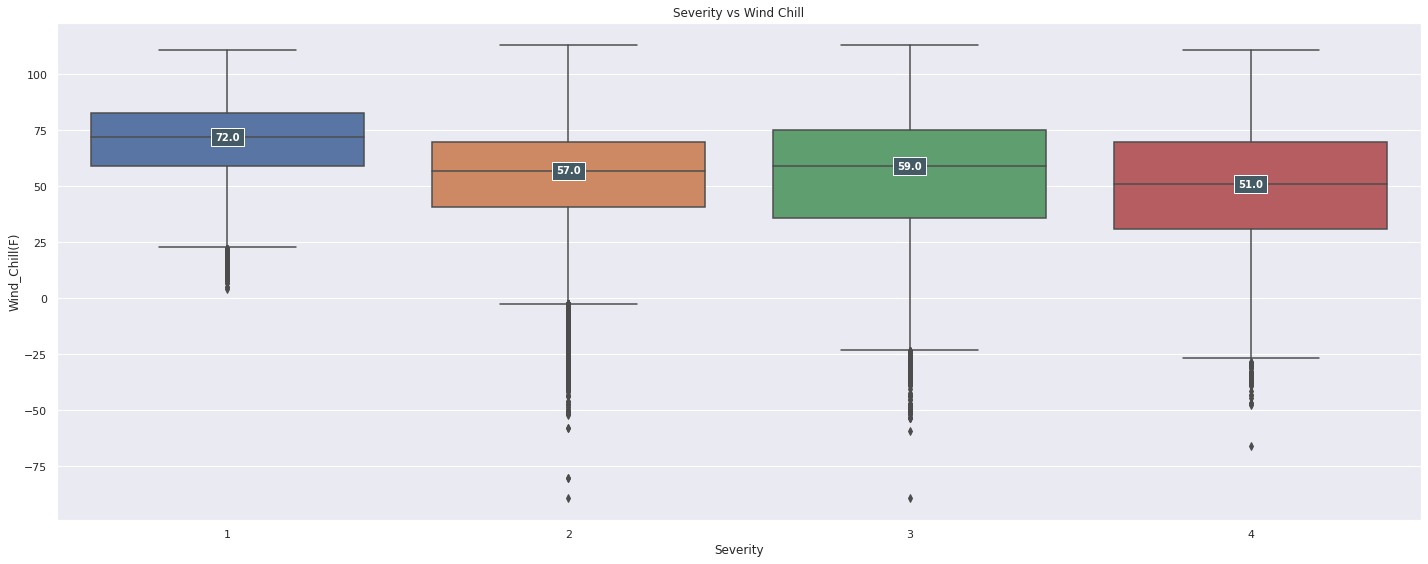

In [ ]:
# Create a wind chill vs severity visualization
box_plot = sns.boxplot(x="Severity", y="Wind_Chill(F)", data=df)
box_plot.set_title('Severity vs Wind Chill')

ax = box_plot.axes
lines = ax.get_lines()
categories = ax.get_xticks()

for cat in categories:
    y = round(lines[4+cat*6].get_ydata()[0],1) 

    ax.text(
        cat, 
        y, 
        f'{y}', 
        ha='center', 
        va='center', 
        fontweight='bold', 
        size=10,
        color='white',
        bbox=dict(facecolor='#445A64'))

box_plot.figure.tight_layout()

Analysis
1. Severity 1 has no effect of wind chill on accidents. 
2. severity 4 indicates that lower wind chill might result in more severe accidents. 

# Humidity Analysis

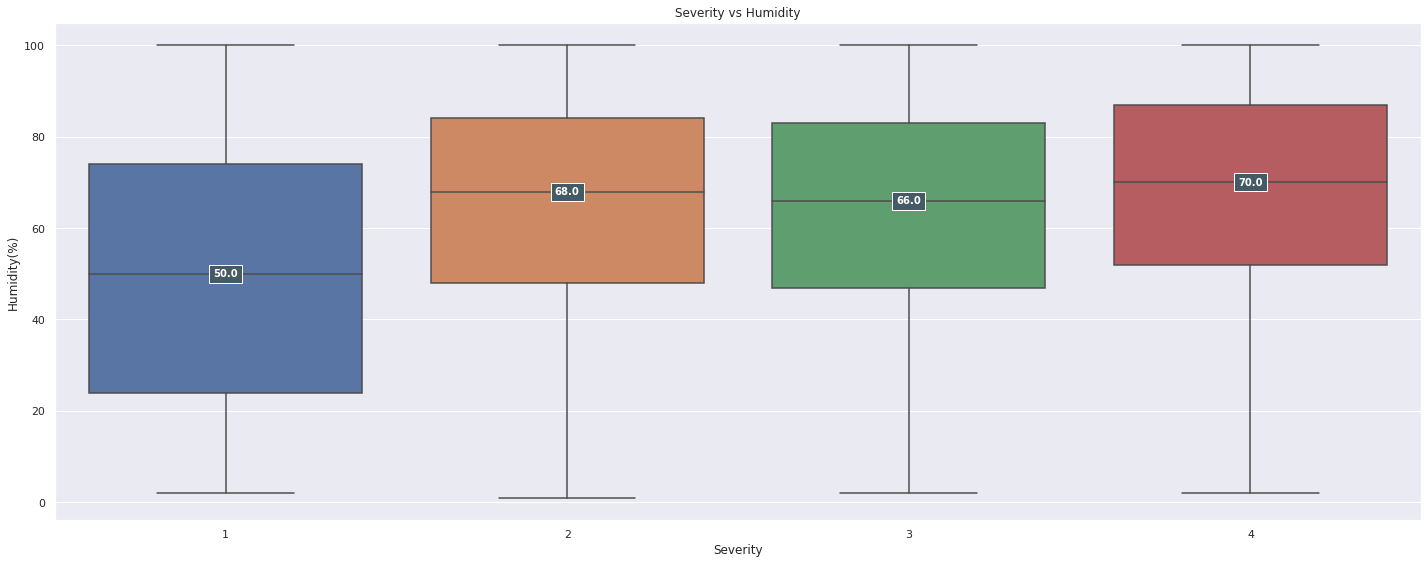

In [ ]:
# Create humidity vs severity visualization
box_plot = sns.boxplot(x="Severity", y="Humidity(%)", data=df)
box_plot.set_title('Severity vs Humidity')

ax = box_plot.axes
lines = ax.get_lines()
categories = ax.get_xticks()

for cat in categories:
    y = round(lines[4+cat*6].get_ydata()[0],1) 

    ax.text(
        cat, 
        y, 
        f'{y}', 
        ha='center', 
        va='center', 
        fontweight='bold', 
        size=10,
        color='white',
        bbox=dict(facecolor='#445A64'))

box_plot.figure.tight_layout()

Analysis
1. Accident severity increases with higher humidity.
2. Severiy 3 accidents lowers a little bit as humidity decreases. 

# Visibility Analysis

In [ ]:
# Create a dataframe for visibility with highest numer of accidents

per_visibility = df['Visibility(mi)'].value_counts()
visibility = pd.DataFrame(per_visibility.head(10).reset_index().rename(columns={'index':'Visibility', 'Visibility(mi)':'Accidents'})).sort_values(by='Visibility', ascending=True)
vis = visibility.groupby("Visibility")["Accidents"].sum()
visibility

,Visibility,Accidents
9,1.0,16643
8,2.0,22091
7,3.0,22753
6,4.0,23511
4,5.0,28883
5,6.0,26465
1,7.0,44433
3,8.0,30265
2,9.0,37704
0,10.0,1178150


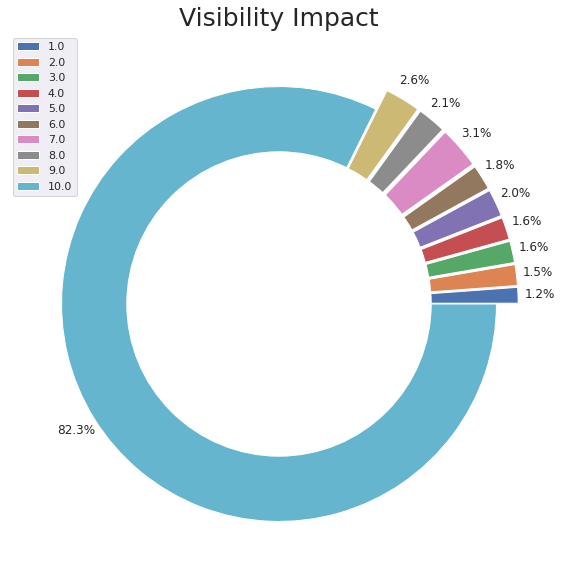

In [ ]:
# Create a visualization for visibility
pie, ax = plt.subplots(figsize=[20,10])
labels = vis.keys()
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0)
plt.pie(x=vis, autopct="%.1f%%", explode=explode,  pctdistance=1.1)
plt.title("Visibility Impact", fontsize=25);
plt.legend(labels=labels)
# draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

Analysis
1. Nearly 1178150 (82%) of accidents occurs when the visibility is the best 10mi.
2. Only 16643 (1.2%) of accidents occurs when the visibility is the worst 1mi.

# Correlation coefficient

In [ ]:
 df.corr()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Year,Month,Day,Hour
Severity,1.000000,0.078723,0.179492,0.078729,0.179495,0.152869,-0.009666,-0.014952,-0.091947,0.047240,0.055531,0.006275,0.063576,0.015370,0.001858,-0.002421,-0.053573,0.008090,0.021885,-0.001240,-0.004697,-0.000593,-0.012372,-0.000271,0.000864,-0.042802,NaN,-0.235179,-0.127123,-0.018719,-0.013464
Start_Lat,0.078723,1.000000,-0.099607,0.999995,-0.099602,0.041404,0.124377,-0.456720,-0.507982,0.044629,-0.154159,-0.073717,0.037014,0.002739,0.013315,0.001322,-0.050361,0.004707,-0.005741,-0.011859,0.005864,-0.006672,-0.054286,0.018116,0.000597,-0.070426,NaN,-0.065219,-0.116580,-0.014029,0.007302
Start_Lng,0.179492,-0.099607,1.000000,-0.099591,0.999999,0.082412,-0.185956,-0.028814,-0.096016,0.199130,0.171926,-0.008167,0.138181,0.028783,0.014305,-0.010461,0.029369,0.021456,-0.005603,0.005310,-0.014222,0.003033,0.023871,-0.040489,-0.002512,0.089101,NaN,-0.043009,0.049681,0.030777,-0.022966
End_Lat,0.078729,0.999995,-0.099591,1.000000,-0.099587,0.041459,0.124360,-0.456719,-0.507987,0.044626,-0.154162,-0.073714,0.037015,0.002737,0.013319,0.001317,-0.050361,0.004694,-0.005727,-0.011857,0.005866,-0.006672,-0.054285,0.018125,0.000594,-0.070425,NaN,-0.065213,-0.116578,-0.014027,0.007310
End_Lng,0.179495,-0.099602,0.999999,-0.099587,1.000000,0.082393,-0.185949,-0.028812,-0.096013,0.199128,0.171927,-0.008165,0.138180,0.028782,0.014305,-0.010460,0.029366,0.021453,-0.005602,0.005311,-0.014221,0.003033,0.023870,-0.040489,-0.002512,0.089099,NaN,-0.043008,0.049683,0.030781,-0.022962
Distance(mi),0.152869,0.041404,0.082412,0.041459,0.082393,1.000000,0.054719,-0.044103,-0.067638,0.039469,-0.016941,-0.019170,0.016305,0.001970,-0.023530,-0.002592,-0.067064,-0.001145,0.018292,-0.006599,-0.018523,-0.001811,-0.039244,-0.012171,-0.003731,-0.097484,NaN,-0.036721,0.039761,0.005565,-0.002516
Number,-0.009666,0.124377,-0.185956,0.124360,-0.185949,0.054719,1.000000,-0.054076,-0.048961,0.028274,-0.046012,-0.021010,0.009707,0.000948,-0.032058,-0.002287,-0.064654,-0.002873,-0.016275,-0.007412,-0.015040,-0.000783,-0.032563,0.001785,-0.003315,-0.083055,NaN,-0.011197,-0.019761,-0.006386,0.006217
Temperature(F),-0.014952,-0.456720,-0.028814,-0.456719,-0.028812,-0.044103,-0.054076,1.000000,0.992669,-0.387202,0.087518,0.188362,0.079064,-0.002094,0.004869,0.000917,0.062861,-0.001557,0.021944,0.010706,0.003572,0.003291,0.039713,-0.008945,0.001135,0.082931,NaN,-0.120318,-0.026213,-0.005216,0.163196
Wind_Chill(F),-0.091947,-0.507982,-0.096016,-0.507987,-0.096013,-0.067638,-0.048961,0.992669,1.000000,-0.369361,0.037004,0.192829,-0.022189,-0.014348,0.011639,0.003424,0.083307,-0.004335,-0.016796,0.010603,0.008877,0.004697,0.054814,0.000539,0.003320,0.101893,NaN,0.276182,0.002511,0.003124,0.152304
Humidity(%),0.047240,0.044629,0.199130,0.044626,0.199128,0.039469,0.028274,-0.387202,-0.369361,1.000000,0.137128,-0.355262,-0.160188,0.058425,-0.003755,-0.004510,-0.054055,0.001489,0.002460,-0.009685,-0.000550,0.002772,-0.003585,-0.008570,-0.003021,-0.056239,NaN,0.032794,0.065316,0.047894,-0.221577


Corelation Explaination

1. A correlation coefficient of 1 indicates a strong positive relationship. For example, shoe sizes go up in (almost) perfect correlation with foot length.
2. A correlation coefficient of -1 indicates a strong negative relationship. For example, the amount of gas in a tank decreases in (almost) perfect correlation with speed.
3. A result of zero indicates no relationship at all.